# Hierarchical Clustering: Advanced Theory & Interview Q&A

## Theory
Hierarchical Clustering builds a tree (dendrogram) of nested clusters using either agglomerative (bottom-up) or divisive (top-down) approaches. It does not require specifying the number of clusters in advance and can use various linkage criteria (single, complete, average, Ward).

| Aspect                | Details                                                                 |
|----------------------|-------------------------------------------------------------------------|
| Algorithm            | Agglomerative (merge) or divisive (split)                               |
| Linkage Criteria     | Single, complete, average, Ward                                         |
| Strengths            | No need to pre-specify clusters, interpretable dendrogram               |
| Weaknesses           | Computationally expensive, sensitive to noise/outliers                  |

## Advanced Interview Q&A
**Q1: What is the difference between agglomerative and divisive clustering?**
A1: Agglomerative starts with individual points and merges clusters, while divisive starts with all points and splits them.

**Q2: How does Ward linkage differ from other linkage methods?**
A2: Ward linkage minimizes the variance within clusters, often producing more compact clusters.

**Q3: How do you interpret a dendrogram?**
A3: The height at which branches merge indicates the distance between clusters; cutting the dendrogram at a certain height yields clusters.

**Q4: What are the scalability challenges of hierarchical clustering?**
A4: It has O(n^2) complexity, making it impractical for very large datasets.

**Q5: How can you handle noise and outliers in hierarchical clustering?**
A5: Use robust linkage methods or preprocess data to remove outliers.

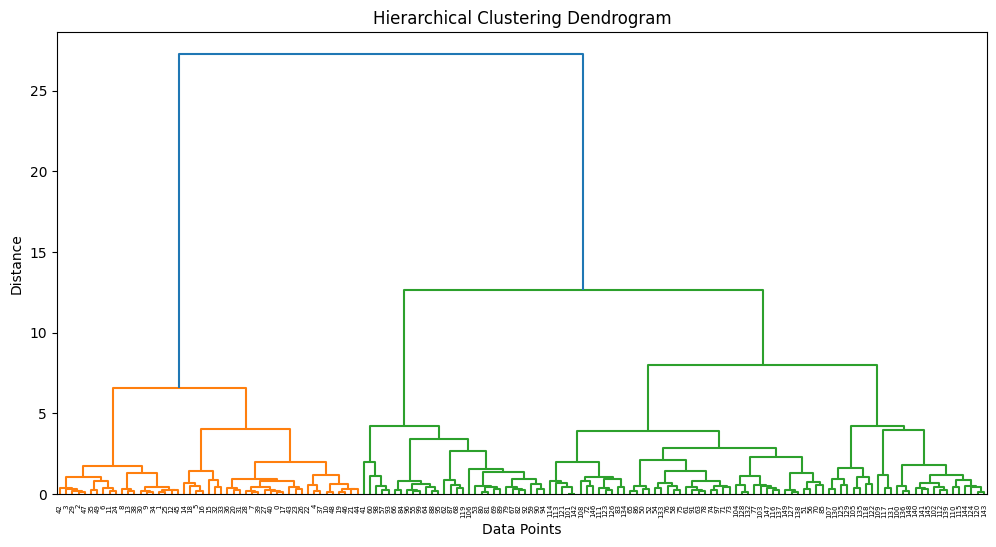

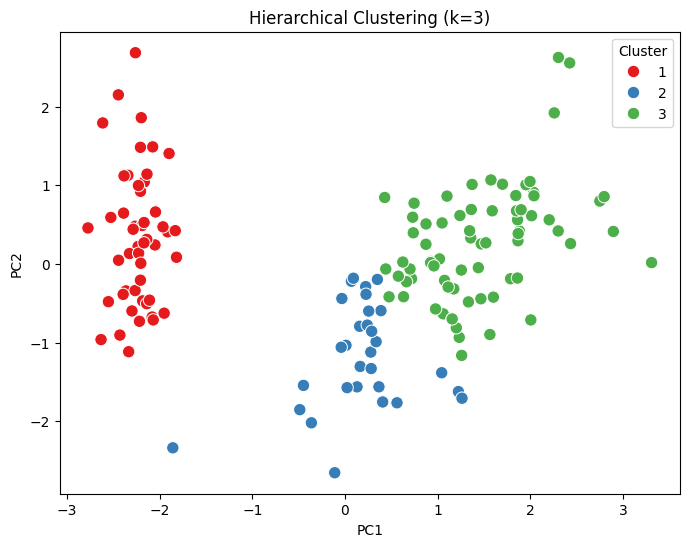

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# 3️⃣ Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Compute Linkage Matrix
linked = linkage(X_scaled, method='ward')  # Ward minimizes variance within clusters

# 5️⃣ Plot Dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked, labels=None, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# 6️⃣ Form Flat Clusters (choose number of clusters)
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# 7️⃣ Visualize Clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=pca_df, s=80)
plt.title(f"Hierarchical Clustering (k={num_clusters})")
plt.show()
